In [59]:
from keras.datasets import mnist

In [60]:
from keras.models import Sequential,Model
from keras.layers import *
from keras.optimizers import Adam

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
(XT,YT),(Xt,Yt) = mnist.load_data()

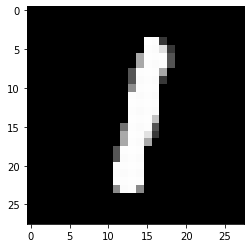

In [63]:
plt.imshow(XT[211],cmap='gray')
plt.show()

In [64]:
XT = (XT.astype('float')-127.5)/127.5

In [65]:
np.unique(XT) #the values are now between -1 and 1

array([-1.        , -0.99215686, -0.98431373, -0.97647059, -0.96862745,
       -0.96078431, -0.95294118, -0.94509804, -0.9372549 , -0.92941176,
       -0.92156863, -0.91372549, -0.90588235, -0.89803922, -0.89019608,
       -0.88235294, -0.8745098 , -0.86666667, -0.85882353, -0.85098039,
       -0.84313725, -0.83529412, -0.82745098, -0.81960784, -0.81176471,
       -0.80392157, -0.79607843, -0.78823529, -0.78039216, -0.77254902,
       -0.76470588, -0.75686275, -0.74901961, -0.74117647, -0.73333333,
       -0.7254902 , -0.71764706, -0.70980392, -0.70196078, -0.69411765,
       -0.68627451, -0.67843137, -0.67058824, -0.6627451 , -0.65490196,
       -0.64705882, -0.63921569, -0.63137255, -0.62352941, -0.61568627,
       -0.60784314, -0.6       , -0.59215686, -0.58431373, -0.57647059,
       -0.56862745, -0.56078431, -0.55294118, -0.54509804, -0.5372549 ,
       -0.52941176, -0.52156863, -0.51372549, -0.50588235, -0.49803922,
       -0.49019608, -0.48235294, -0.4745098 , -0.46666667, -0.45

In [66]:
XT = XT.reshape((XT.shape[0],-1))
XT.shape

(60000, 784)

In [67]:
batch_size = 256
epochs = 50
n_batches = int(XT.shape[0]/batch_size)
half_batch = 128
noise_dim = 100 # this will be used to generate 784 dimension vector
adam = Adam(lr=2e-4,beta_1=0.5)

In [68]:
generator = Sequential()
generator.add(Dense(256,input_shape=(noise_dim,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 784)              

In [69]:
discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)

discriminator.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [70]:
#GAN
discriminator.trainable = False
gan_input = Input(shape=(noise_dim,))
generated_image = generator(gan_input)

gan_output = discriminator(generated_image)

#using the keras functional API to combine the two models
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [71]:
def save_images(epoch,samples=100):
    noise = np.random.normal(0,1,(samples,noise_dim))
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape((-1,28,28))
    plt.figure(figsize=(10,10))

    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_images[i],cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

Epoch 1 Discriminator Loss 0.6570 Generator Loss 0.9148
Epoch 2 Discriminator Loss 0.6529 Generator Loss 0.9758
Epoch 3 Discriminator Loss 0.6407 Generator Loss 1.0780
Epoch 4 Discriminator Loss 0.6226 Generator Loss 1.1440
Epoch 5 Discriminator Loss 0.5928 Generator Loss 1.2658


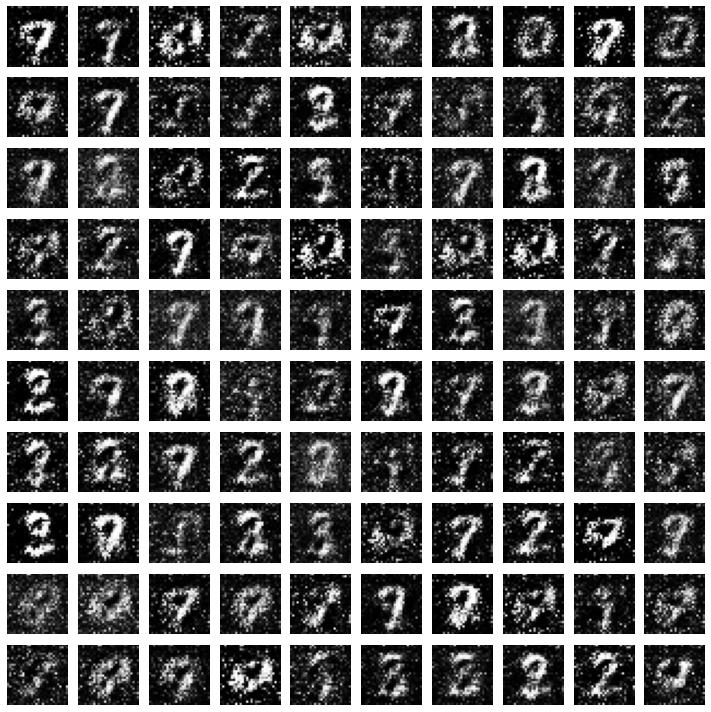

Epoch 6 Discriminator Loss 0.5801 Generator Loss 1.2597
Epoch 7 Discriminator Loss 0.5781 Generator Loss 1.2668
Epoch 8 Discriminator Loss 0.5853 Generator Loss 1.2278
Epoch 9 Discriminator Loss 0.6056 Generator Loss 1.1594
Epoch 10 Discriminator Loss 0.6187 Generator Loss 1.1204


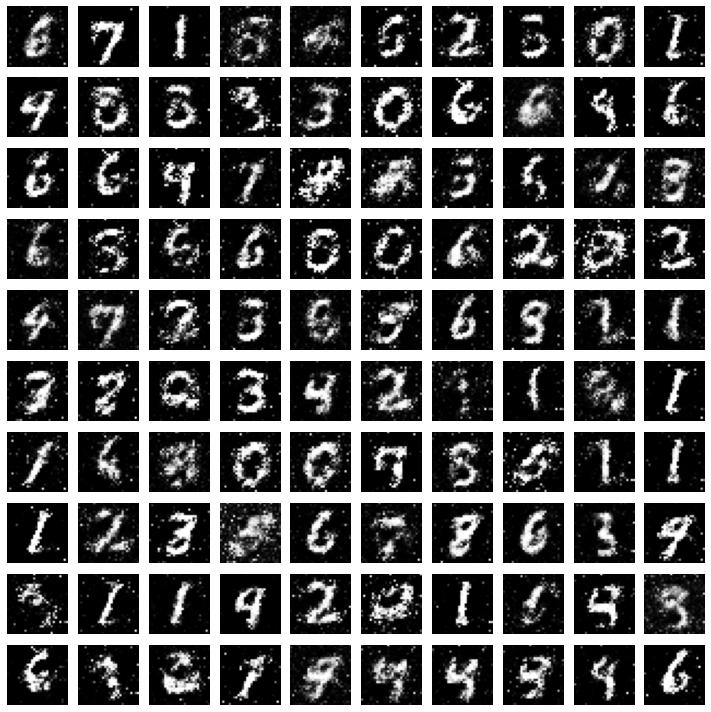

Epoch 11 Discriminator Loss 0.6343 Generator Loss 1.0442
Epoch 12 Discriminator Loss 0.6332 Generator Loss 1.0431
Epoch 13 Discriminator Loss 0.6412 Generator Loss 1.0265
Epoch 14 Discriminator Loss 0.6428 Generator Loss 1.0222
Epoch 15 Discriminator Loss 0.6420 Generator Loss 1.0296


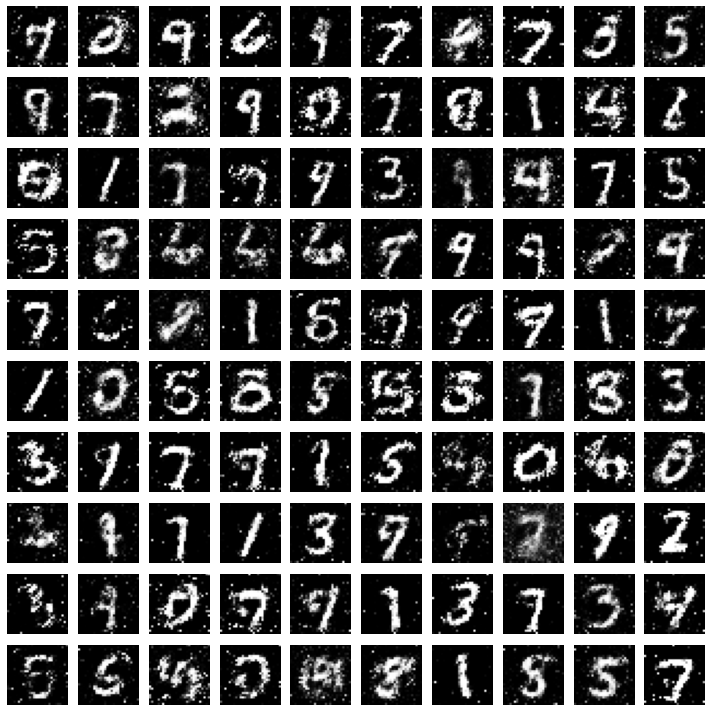

Epoch 16 Discriminator Loss 0.6404 Generator Loss 1.0307
Epoch 17 Discriminator Loss 0.6432 Generator Loss 1.0166
Epoch 18 Discriminator Loss 0.6449 Generator Loss 1.0204
Epoch 19 Discriminator Loss 0.6498 Generator Loss 1.0086
Epoch 20 Discriminator Loss 0.6487 Generator Loss 1.0133


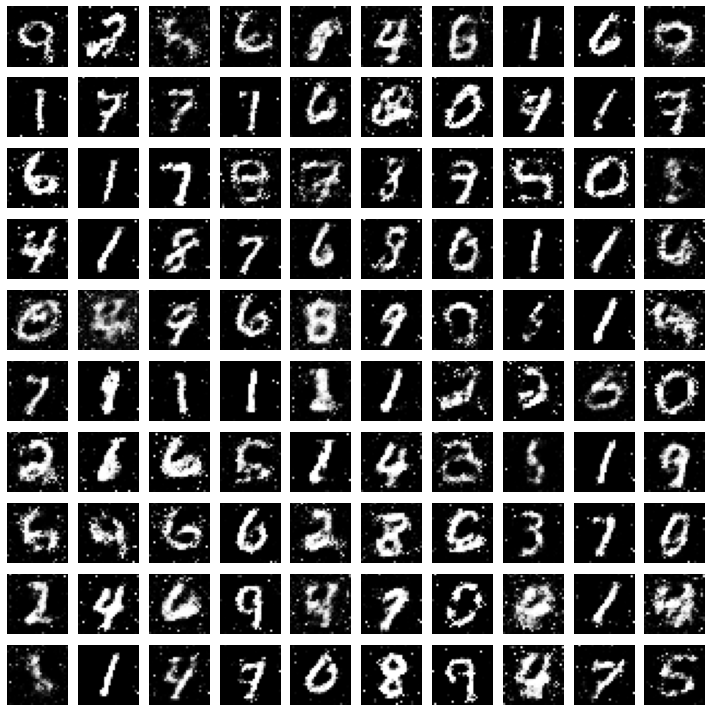

Epoch 21 Discriminator Loss 0.6536 Generator Loss 1.0063
Epoch 22 Discriminator Loss 0.6537 Generator Loss 1.0135
Epoch 23 Discriminator Loss 0.6567 Generator Loss 0.9974
Epoch 24 Discriminator Loss 0.6565 Generator Loss 0.9951
Epoch 25 Discriminator Loss 0.6568 Generator Loss 0.9966


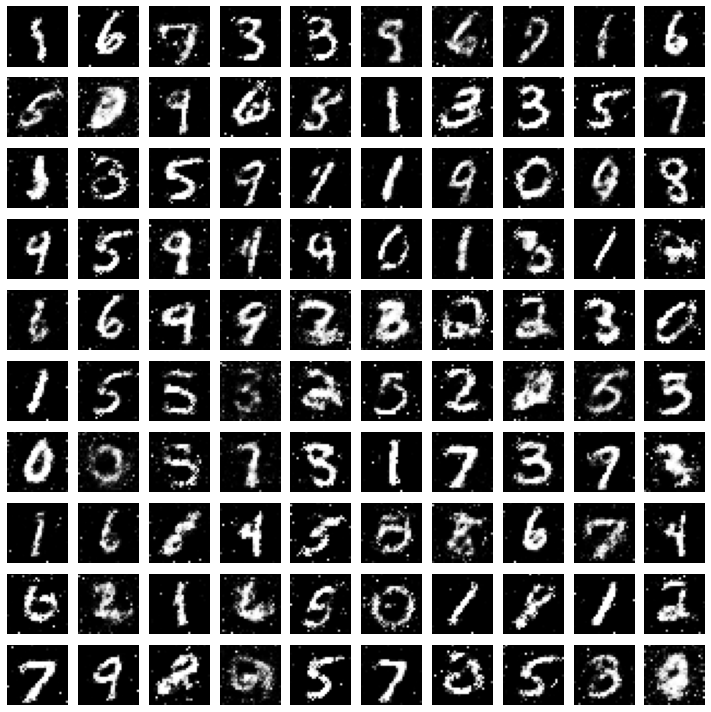

Epoch 26 Discriminator Loss 0.6565 Generator Loss 0.9977
Epoch 27 Discriminator Loss 0.6584 Generator Loss 0.9941
Epoch 28 Discriminator Loss 0.6576 Generator Loss 1.0018
Epoch 29 Discriminator Loss 0.6599 Generator Loss 0.9934
Epoch 30 Discriminator Loss 0.6610 Generator Loss 1.0012


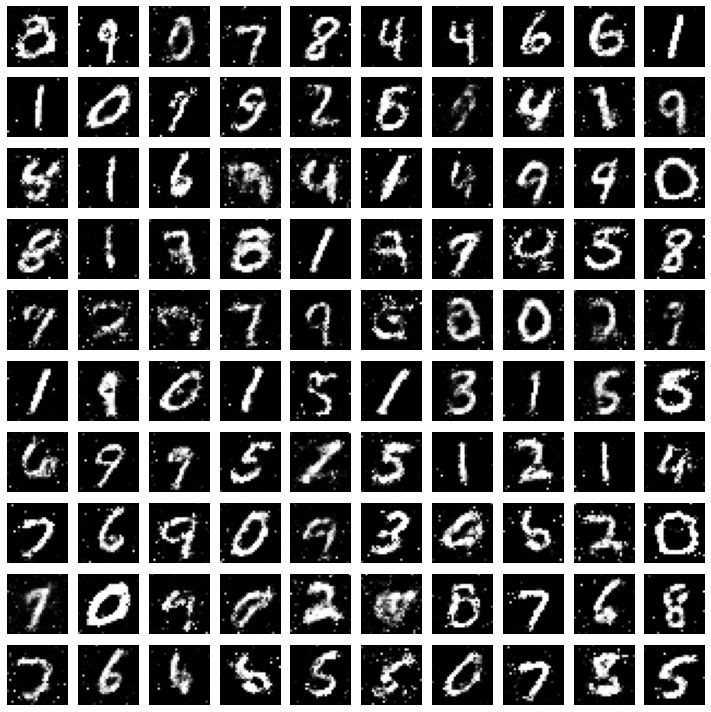

Epoch 31 Discriminator Loss 0.6607 Generator Loss 0.9946
Epoch 32 Discriminator Loss 0.6616 Generator Loss 0.9958
Epoch 33 Discriminator Loss 0.6606 Generator Loss 0.9909
Epoch 34 Discriminator Loss 0.6622 Generator Loss 0.9870
Epoch 35 Discriminator Loss 0.6606 Generator Loss 1.0001


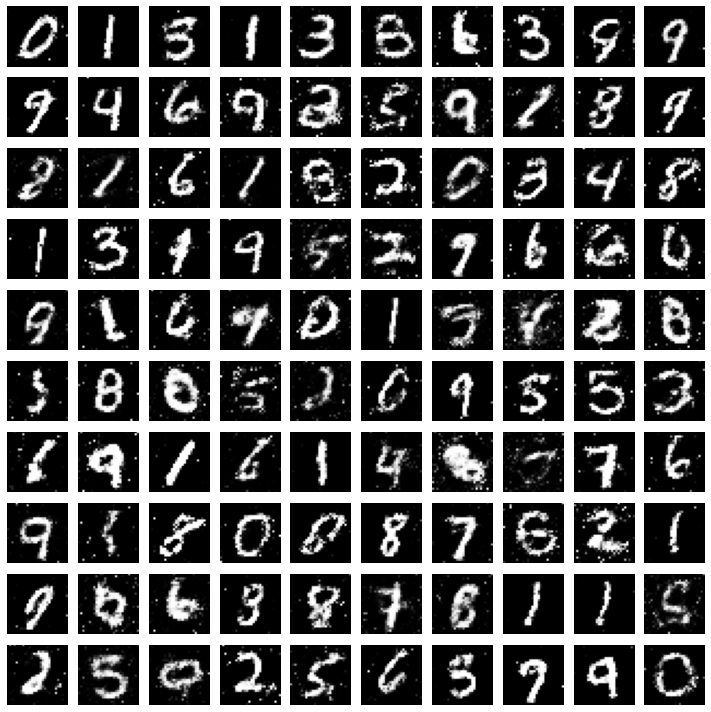

Epoch 36 Discriminator Loss 0.6615 Generator Loss 0.9910
Epoch 37 Discriminator Loss 0.6610 Generator Loss 0.9887
Epoch 38 Discriminator Loss 0.6614 Generator Loss 0.9852
Epoch 39 Discriminator Loss 0.6605 Generator Loss 0.9930
Epoch 40 Discriminator Loss 0.6618 Generator Loss 0.9944


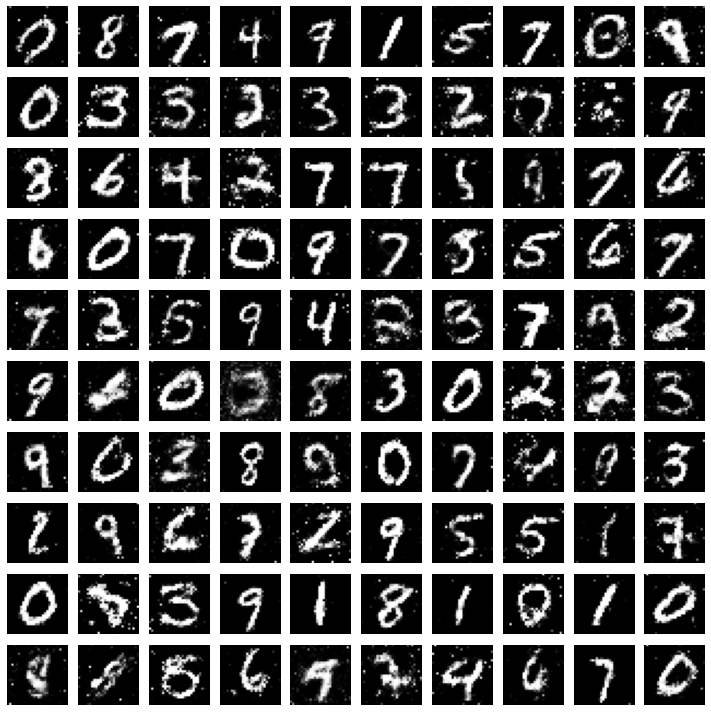

Epoch 41 Discriminator Loss 0.6622 Generator Loss 0.9873
Epoch 42 Discriminator Loss 0.6617 Generator Loss 0.9922
Epoch 43 Discriminator Loss 0.6616 Generator Loss 0.9911
Epoch 44 Discriminator Loss 0.6624 Generator Loss 0.9893
Epoch 45 Discriminator Loss 0.6636 Generator Loss 0.9953


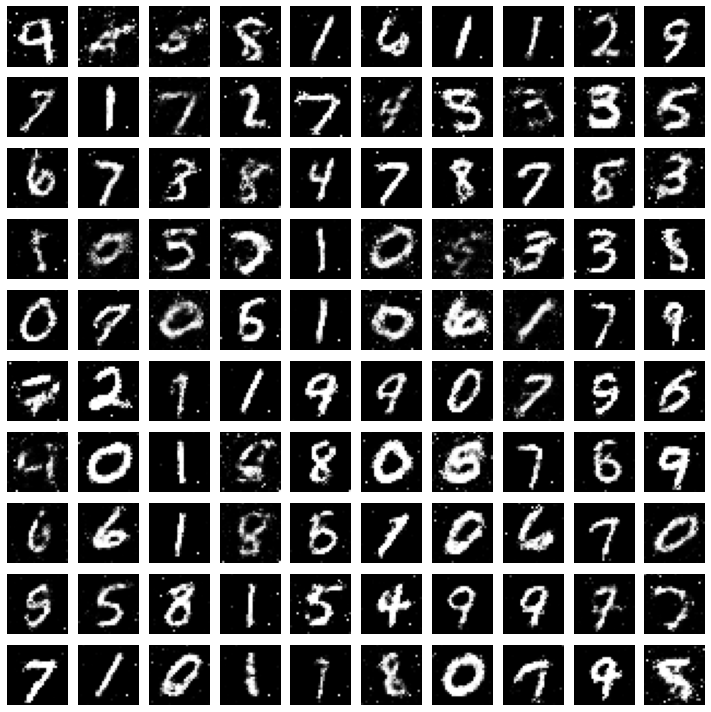

Epoch 46 Discriminator Loss 0.6620 Generator Loss 0.9864
Epoch 47 Discriminator Loss 0.6627 Generator Loss 0.9922
Epoch 48 Discriminator Loss 0.6634 Generator Loss 0.9817
Epoch 49 Discriminator Loss 0.6637 Generator Loss 0.9908
Epoch 50 Discriminator Loss 0.6632 Generator Loss 0.9876


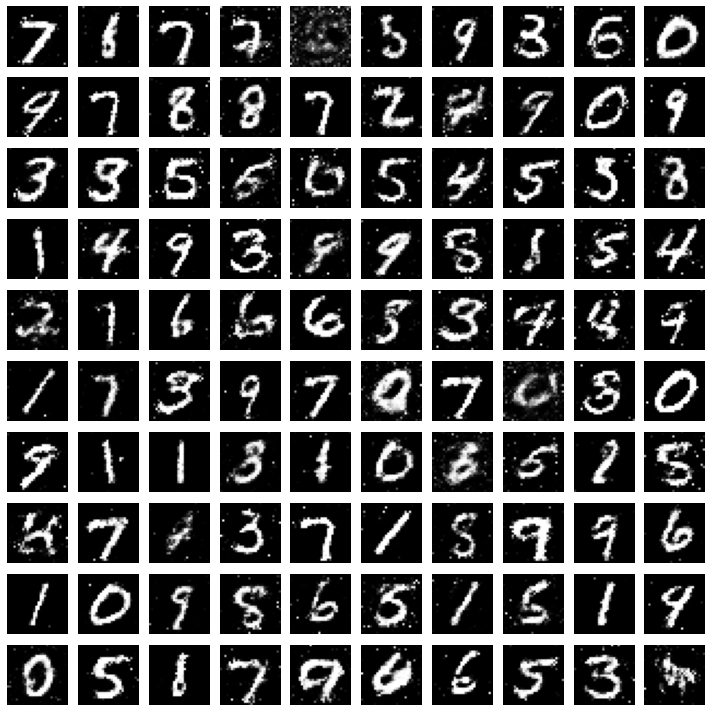

In [72]:
dloss = []
gloss = []
for epoch in range(epochs):
    epoch_d_loss = 0.0
    epoch_g_loss = 0.0

    #Mini Batch Gradient Descend
    for batch in range(n_batches):
        #training the discriminator with 50% real data and 50% fake data
        idx = np.random.randint(0,XT.shape[0],half_batch)
        real_imgs = XT[idx]

        noise = np.random.normal(0,1,size=(half_batch,noise_dim))
        fake_imgs = generator.predict(noise)

        real_y = np.ones((half_batch,1))*0.9 #one sided label smoothing for discriminator
        fake_y = np.zeros((half_batch,1))

        real_loss_d,fake_loss_d = discriminator.train_on_batch(real_imgs,real_y),discriminator.train_on_batch(fake_imgs,fake_y)
        loss_d = (real_loss_d + fake_loss_d)/2.0

        epoch_d_loss += loss_d
        dloss.append(loss_d)
        #training the generator considering frozen discriminator
        noise = np.random.normal(0,1,(batch_size,noise_dim))
        labels = np.ones((batch_size,1))

        loss_g = model.train_on_batch(noise,labels)
        epoch_g_loss += loss_g
        gloss.append(loss_g)
        
    print('Epoch %d Discriminator Loss %.4f Generator Loss %.4f' %((epoch+1),epoch_d_loss/n_batches,epoch_g_loss/n_batches))
    if (epoch+1)%5 == 0:
        generator.save('model/gen_generator{0}.h5'.format(epoch+1))
        save_images(epoch)

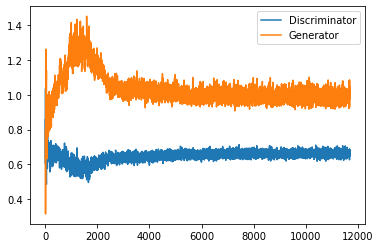

In [76]:
plt.plot(dloss,label='Discriminator')
plt.plot(gloss,label='Generator')
plt.legend()
plt.show()

In [73]:
!ls

images	model  sample_data


In [79]:
!zip -r /content/images.zip /content/images

updating: content/images/ (stored 0%)
  adding: content/images/gan_output_epoch_50.png (deflated 7%)
  adding: content/images/gan_output_epoch_40.png (deflated 7%)
  adding: content/images/gan_output_epoch_45.png (deflated 7%)
  adding: content/images/gan_output_epoch_35.png (deflated 7%)
  adding: content/images/gan_output_epoch_5.png (deflated 5%)
  adding: content/images/gan_output_epoch_20.png (deflated 7%)
  adding: content/images/gan_output_epoch_10.png (deflated 5%)
  adding: content/images/gan_output_epoch_15.png (deflated 6%)
  adding: content/images/gan_output_epoch_30.png (deflated 7%)
  adding: content/images/gan_output_epoch_25.png (deflated 7%)


In [75]:
!ls

images	images.zip  model  sample_data


In [80]:
from google.colab import files
files.download('images.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>